**1. Загрузить файл 'telecom_churn.csv'.**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('telecom_churn.csv')
df['Area code'] = df['Area code'].astype(str)
numeric = df.select_dtypes(include='number').columns
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [2]:
numeric

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls'],
      dtype='object')

**2. Проверить данные на наличие пропусков и выбросов. Обработать пропуски и выбросы.**

In [3]:
df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [4]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [5]:
for col in numeric:
    df = handle_outliers(df, col)

In [6]:
df.reset_index(inplace=True)
df

,index,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,4,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
4,5,AL,118,510,Yes,No,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,3328,AZ,192,415,No,Yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2793,3329,WV,68,415,No,No,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2794,3330,RI,28,510,No,No,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2795,3331,CT,184,510,Yes,No,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


**3. Выполнить кодирование категориальных переменных.**

In [7]:
categorized_df = df.select_dtypes(exclude=[np.number])
categorized_df.head()

,State,Area code,International plan,Voice mail plan,Churn
0,KS,415,No,Yes,False
1,OH,415,No,Yes,False
2,NJ,415,No,No,False
3,OK,415,Yes,No,False
4,AL,510,Yes,No,False


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cols = encoder.fit_transform(df[['Area code', 'International plan', 'Voice mail plan']])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['Area code', 'International plan', 
                                                                               'Voice mail plan']))
encoded_df

,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
2792,1.0,0.0,0.0,1.0
2793,1.0,0.0,0.0,0.0
2794,0.0,1.0,0.0,0.0
2795,0.0,1.0,1.0,0.0


In [9]:
from category_encoders.count import CountEncoder as ce_CountEncoder

c_encoder = ce_CountEncoder(normalize=True)
state_encode = c_encoder.fit_transform(categorized_df['State'])
state_encode.reset_index(inplace=True)

In [10]:
state_encode

,index,State
0,0,0.021452
1,1,0.023597
2,2,0.021809
3,3,0.017519
4,4,0.023954
...,...,...
2792,2792,0.018949
2793,2793,0.032535
2794,2794,0.020021
2795,2795,0.022882


In [11]:
categorized_df = pd.concat([encoded_df, state_encode], axis=1)

In [12]:
categorized_df

,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes,index,State
0,1.0,0.0,0.0,1.0,0,0.021452
1,1.0,0.0,0.0,1.0,1,0.023597
2,1.0,0.0,0.0,0.0,2,0.021809
3,1.0,0.0,1.0,0.0,3,0.017519
4,0.0,1.0,1.0,0.0,4,0.023954
...,...,...,...,...,...,...
2792,1.0,0.0,0.0,1.0,2792,0.018949
2793,1.0,0.0,0.0,0.0,2793,0.032535
2794,0.0,1.0,0.0,0.0,2794,0.020021
2795,0.0,1.0,1.0,0.0,2795,0.022882


In [13]:
y = df['Churn']

In [14]:
concated_df = pd.concat([df, categorized_df], axis=1)
concated_df.drop(['Area code', 'International plan', 'Voice mail plan', 'State', 'Churn'], axis=1, inplace=True)
concated_df

,index,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes,index
0,0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,...,11.01,10.0,3,2.70,1,1.0,0.0,0.0,1.0,0
1,1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,11.45,13.7,3,3.70,1,1.0,0.0,0.0,1.0,1
2,2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,7.32,12.2,5,3.29,0,1.0,0.0,0.0,0.0,2
3,4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,8.41,10.1,3,2.73,3,1.0,0.0,1.0,0.0,3
4,5,118,0,223.4,98,37.98,220.6,101,18.75,203.9,...,9.18,6.3,6,1.70,0,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2792,3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,...,12.56,9.9,6,2.67,2,1.0,0.0,0.0,1.0,2792
2793,3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,...,8.61,9.6,4,2.59,3,1.0,0.0,0.0,0.0,2793
2794,3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,...,8.64,14.1,6,3.81,2,0.0,1.0,0.0,0.0,2794
2795,3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,...,6.26,5.0,10,1.35,2,0.0,1.0,1.0,0.0,2795


In [15]:
concated_df = concated_df.drop('index', axis=1)

**4. Выполнить масштабирование признаков.**

In [16]:
columns = concated_df.columns

from sklearn.preprocessing import MinMaxScaler

m_scaler = MinMaxScaler()
rez_df = pd.DataFrame(m_scaler.fit_transform(concated_df))

rez_df.columns = columns
rez_df.head()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.622549,0.50,0.798455,0.600000,0.798430,0.486667,0.481132,0.486710,0.665428,0.413462,0.665289,0.474820,0.222222,0.474667,0.333333,1.0,0.0,0.0,1.0
1,0.519608,0.52,0.435042,0.723810,0.434944,0.479630,0.518868,0.479739,0.701487,0.528846,0.701653,0.741007,0.222222,0.741333,0.333333,1.0,0.0,0.0,1.0
2,0.666667,0.00,0.722261,0.638095,0.722222,0.204444,0.584906,0.204357,0.360223,0.538462,0.360331,0.633094,0.444444,0.632000,0.000000,1.0,0.0,0.0,0.0
3,0.362745,0.00,0.452949,0.628571,0.452912,0.304815,0.698113,0.305011,0.450558,0.701923,0.450413,0.482014,0.222222,0.482667,1.000000,1.0,0.0,1.0,0.0
4,0.573529,0.00,0.652037,0.485714,0.652003,0.572593,0.500000,0.572549,0.513755,0.673077,0.514050,0.208633,0.555556,0.208000,0.000000,0.0,1.0,1.0,0.0


Построение модели

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

X = rez_df
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [18]:
from sklearn.tree import DecisionTreeClassifier

In [19]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.919047619047619

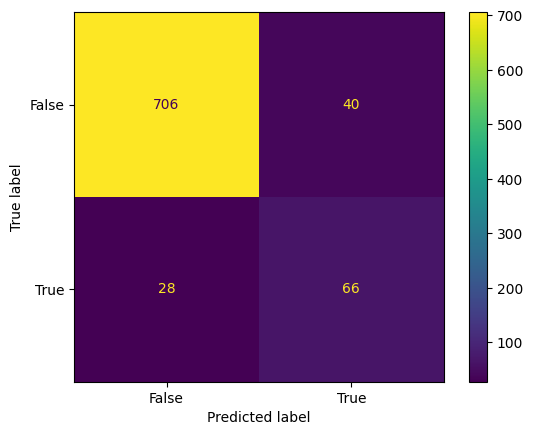

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=model.classes_)
cmd.plot()

In [21]:
from sklearn import tree

In [22]:
X_test.columns

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Area code_415', 'Area code_510', 'International plan_Yes',
       'Voice mail plan_Yes'],
      dtype='object')

In [23]:
print(tree.export_text(model, feature_names=list(X_test.columns)))

|--- Total day charge <= 0.78
|   |--- International plan_Yes <= 0.50
|   |   |--- Total day minutes <= 0.65
|   |   |   |--- Total night calls <= 0.60
|   |   |   |   |--- Total eve minutes <= 0.04
|   |   |   |   |   |--- Total eve charge <= 0.03
|   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- Total eve charge >  0.03
|   |   |   |   |   |   |--- class: True
|   |   |   |   |--- Total eve minutes >  0.04
|   |   |   |   |   |--- Total eve charge <= 0.50
|   |   |   |   |   |   |--- Account length <= 0.13
|   |   |   |   |   |   |   |--- Account length <= 0.11
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- Account length >  0.11
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- Account length >  0.13
|   |   |   |   |   |   |   |--- Customer service calls <= 0.83
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- Customer service calls >  0.83
|   |   |   |   |   |   |   

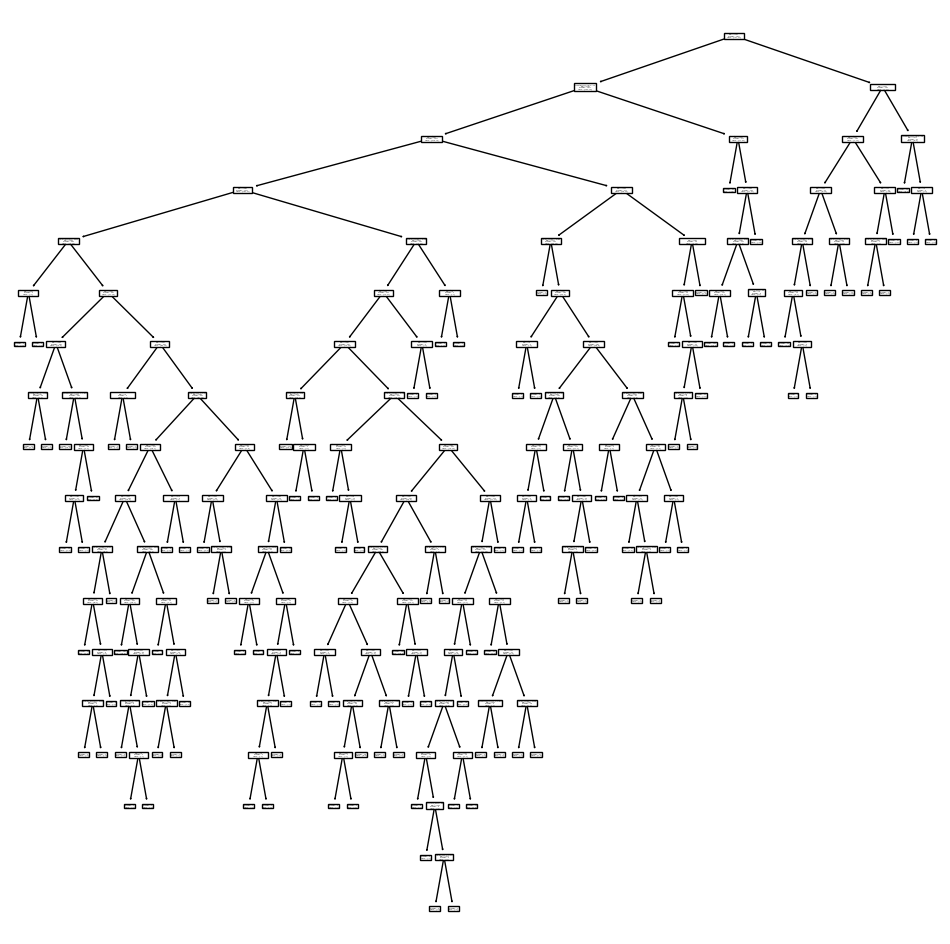

In [24]:
plt.figure(figsize=(12, 12))
tree.plot_tree(model, feature_names=list(X_test.columns));

In [25]:
max_features = ["sqrt", "log2", "log_loss"]
max_depth = list(range(1, 30))
criterion = ["gini", "entropy"]
grid = {
    "max_features": max_features,
    "max_depth": max_depth,
    "criterion": criterion
}

In [26]:
search = GridSearchCV(model, grid, cv=5, verbose=2)
search.fit(X_train, y_train)

Fitting 5 folds for each of 174 candidates, totalling 870 fits
[CV] END .....criterion=gini, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=1, max_features=log2; total time=   0.0s
[CV] END .criterion=gini, max_depth=1, max_features=log_loss; total time=   0.0s
[CV] END .criterion=gini, max_depth=1, max_fea

[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .....criterion=gini, max_depth=8, max_features=log2; total time=   0.0s
[CV] END .criterion=gini, max_depth=8, max_features=log_loss; total time=   0.0s
[CV] END .criterion=gini, max_depth=8, max_features=log_loss; total time=   0.0s
[CV] END .criterion=gini, max_depth=8, max_features=log_loss; total time=   0.0s
[CV] END .criterion=gini, ma

[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=15, max_features=log2; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=15, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max

[CV] END ....criterion=gini, max_depth=22, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=22, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=22, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=22, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=22, max_features=log2; total time=   0.0s
[CV] END criterion=gini, max_depth=22, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=22, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=22, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=22, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=22, max_features=log_loss; total time=   0.0s
[CV] END ....criterion=gini, max_depth=23, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini, max_depth=23, max_features=sqrt; total time=   0.0s
[CV] END ....criterion=gini,

[CV] END ....criterion=gini, max_depth=29, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=29, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=29, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=29, max_features=log2; total time=   0.0s
[CV] END ....criterion=gini, max_depth=29, max_features=log2; total time=   0.0s
[CV] END criterion=gini, max_depth=29, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=29, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=29, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=29, max_features=log_loss; total time=   0.0s
[CV] END criterion=gini, max_depth=29, max_features=log_loss; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=1, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy

[CV] END ..criterion=entropy, max_depth=7, max_features=log2; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=7, max_features=log_loss; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=sqrt; total time=   0.0s
[CV] END ..criterion=entropy, max_depth=8, max_features=log2; total time=   0.0s
[CV] END ..criteri

[CV] END .criterion=entropy, max_depth=14, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=14, max_features=log2; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=14, max_features=log_loss; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=15, max_features=sqrt; total time=   0.0s
[CV] END .cri

[CV] END criterion=entropy, max_depth=21, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=21, max_features=log_loss; total time=   0.0s
[CV] END criterion=entropy, max_depth=21, max_features=log_loss; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=22, max_features=log2; total time=   0.0s
[CV] END .criterion

[CV] END criterion=entropy, max_depth=28, max_features=log_loss; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=sqrt; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=log2; total time=   0.0s
[CV] END .criterion=entropy, max_depth=29, max_features=log2; total time=   0.0s
[CV] END criterion=entropy, max_depth=29, max_features=log_loss; total time=   0.0s
[CV] END criterion=ent

C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
290 fits failed out of a total of 870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
290 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "C:\Users\peres\anaconda3\envs\bmstu\Lib\site-packages\sklearn\tree\_classes.py", line 317, in fit
    raise ValueError(
ValueError: Invalid value for max_

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29],
                         'max_features': ['sqrt', 'log2', 'log_loss']},
             verbose=2)

In [27]:
search.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt'}

In [28]:
model = search.best_estimator_
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features='sqrt')

In [29]:
print(tree.export_text(model, feature_names=list(X_test.columns)))

|--- International plan_Yes <= 0.50
|   |--- Total day minutes <= 0.78
|   |   |--- Total eve minutes <= 0.66
|   |   |   |--- Total eve minutes <= 0.37
|   |   |   |   |--- Total eve calls <= 0.32
|   |   |   |   |   |--- Total eve calls <= 0.31
|   |   |   |   |   |   |--- Total eve charge <= 0.04
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- Total eve charge >  0.04
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |--- Total eve calls >  0.31
|   |   |   |   |   |   |--- Total day calls <= 0.28
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- Total day calls >  0.28
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |--- Total eve calls >  0.32
|   |   |   |   |   |--- Total day charge <= 0.21
|   |   |   |   |   |   |--- Total day minutes <= 0.21
|   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |--- Total day minutes >  0.21
|   |   |   |   |   |   |   |--- class: True
|   |   |  

In [30]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9357142857142857

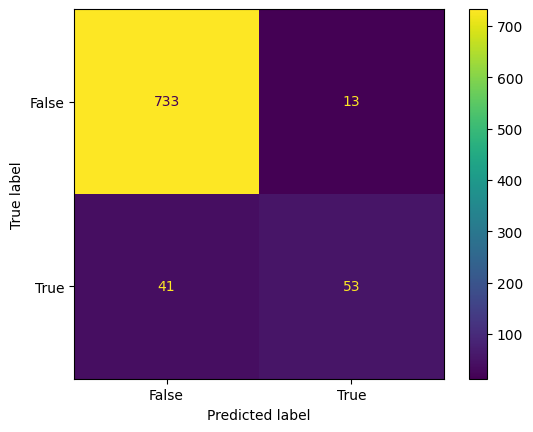

In [31]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier()

rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)
          }


search = RandomizedSearchCV(rfc,
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=1)

search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [33]:
search.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [34]:
model = search.best_estimator_
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=70)

In [35]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9511904761904761

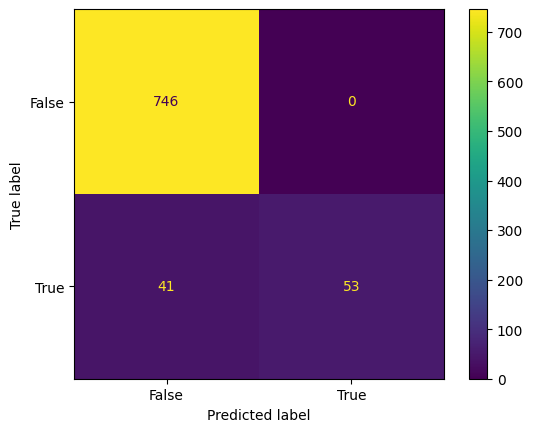

In [36]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()